In [20]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

conf = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [21]:
cases = conf.loc[(conf['Country/Region'] == 'China') & (conf['Province/State'] == 'Hubei') | (conf['Country/Region'] == 'Italy')]
cases_d = cases.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
cases_d_t = cases_d.transpose()
cases_d

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
16,0,0,0,0,0,0,0,0,0,2,...,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021
154,444,444,549,761,1058,1423,3554,3554,4903,5806,...,67773,67781,67786,67790,67794,67798,67799,67800,67800,67800


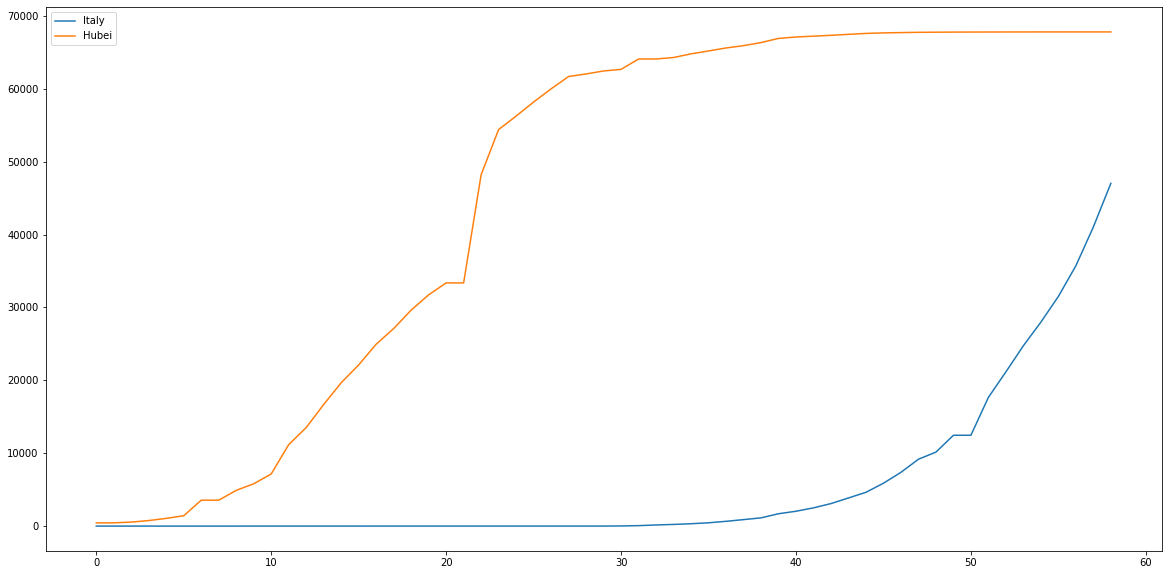

In [22]:
cases_d_t = cases_d.transpose()
cases_d_t = cases_d_t.reset_index()
cases_d_t.rename(columns={'index': 'Date', 16: 'Italy', 154: 'Hubei'}, inplace=True)
cases_d_t.plot(figsize = (20, 10))

In [23]:
# Shift data to outbreak start
cases_d_t['Italy'] = cases_d_t['Italy'].shift(-32)
cases_d_t

,Date,Italy,Hubei
0,1/22/20,155.0,444
1,1/23/20,229.0,444
2,1/24/20,322.0,549
3,1/25/20,453.0,761
4,1/26/20,655.0,1058
5,1/27/20,888.0,1423
6,1/28/20,1128.0,3554
7,1/29/20,1694.0,3554
8,1/30/20,2036.0,4903
9,1/31/20,2502.0,5806


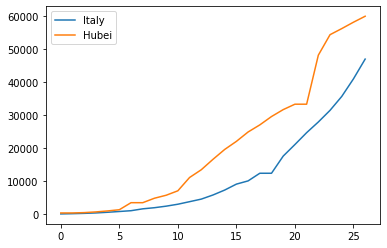

In [24]:
count = 0
for act_cases in cases_d_t['Italy']:
    if np.isnan(act_cases):
        count += 1

cases_count = len(cases_d_t['Italy']) - count
offset = cases_d_t[0:cases_count]
offset.plot()

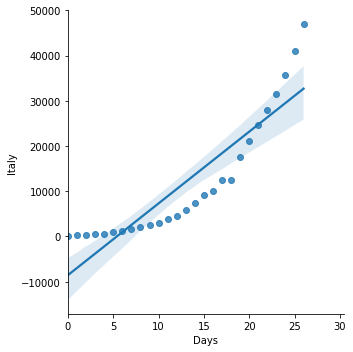

In [25]:
italy_cases = conf.loc[conf['Country/Region'] == 'Italy']
italy_cases = italy_cases.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
italy_cases_t = italy_cases.transpose()
italy_cases_t = italy_cases_t.reset_index()
italy_cases_t = italy_cases_t.drop('index', axis=1)
italy_cases_t = italy_cases_t.reset_index()
italy_cases_t.rename(columns={'index': 'Days', 16: 'Italy'}, inplace=True)
italy_cases_t['Italy'] = italy_cases_t['Italy'].shift(-32)
italy_cases_t = italy_cases_t[0:30]
sns.lmplot(x='Days',y='Italy',data=italy_cases_t,fit_reg=True) 